In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import sklearn
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV

plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Load Data and Explore

Start by loading the diabetes dataset into a pandas dataframe. Check the number of instances and attributes in the dataset.

In [2]:
data = pd.read_csv("../src/data/diabetes_dataset.csv")

In [3]:
data.shape

(2000, 9)

Explore the data a bit. There are 9 columns, where Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age are the features, and Outcome is the target label we will use for the regression fitting task.

Use the info() function to get a sense of number of features and its data type. Display all the features/attributes in the diabetes dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Use head() function to display top 5 patients/instances data

In [5]:
attributes = data.columns
description = ['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skinfold thickness', '2-hour serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age (years)', 'Diabetes diagnose results (0: Negative, 1: Positive)']
types = ['Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Nominal']

info = pd.DataFrame({'Attribute':attributes, 'Description': description, 'Type':types})
print(info.style.to_latex())
info.style.to_latex('../reports/tables/table-03-data-info.tex')

\begin{tabular}{llll}
 & Attribute & Description & Type \\
0 & Pregnancies & Number of times pregnant & Numeric \\
1 & Glucose & Plasma glucose concentration & Numeric \\
2 & BloodPressure & Diastolic blood pressure & Numeric \\
3 & SkinThickness & Triceps skinfold thickness & Numeric \\
4 & Insulin & 2-hour serum insulin & Numeric \\
5 & BMI & Body mass index & Numeric \\
6 & DiabetesPedigreeFunction & Diabetes pedigree function & Numeric \\
7 & Age & Age (years) & Numeric \\
8 & Outcome & Diabetes diagnose results (0: Negative, 1: Positive) & Nominal \\
\end{tabular}



In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Use the describe() function to get a sense of the number of values, and their min, max, mean and variance for numeric attributes.

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


### Attributes with Missing Value Counts

Count the number of missing or NaN data in the dataframe, show the counts of missing data for each of the features in the dataframe.

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Distribution and Visualization

Plot the histograms to show data distribution for each attribute in the dataset

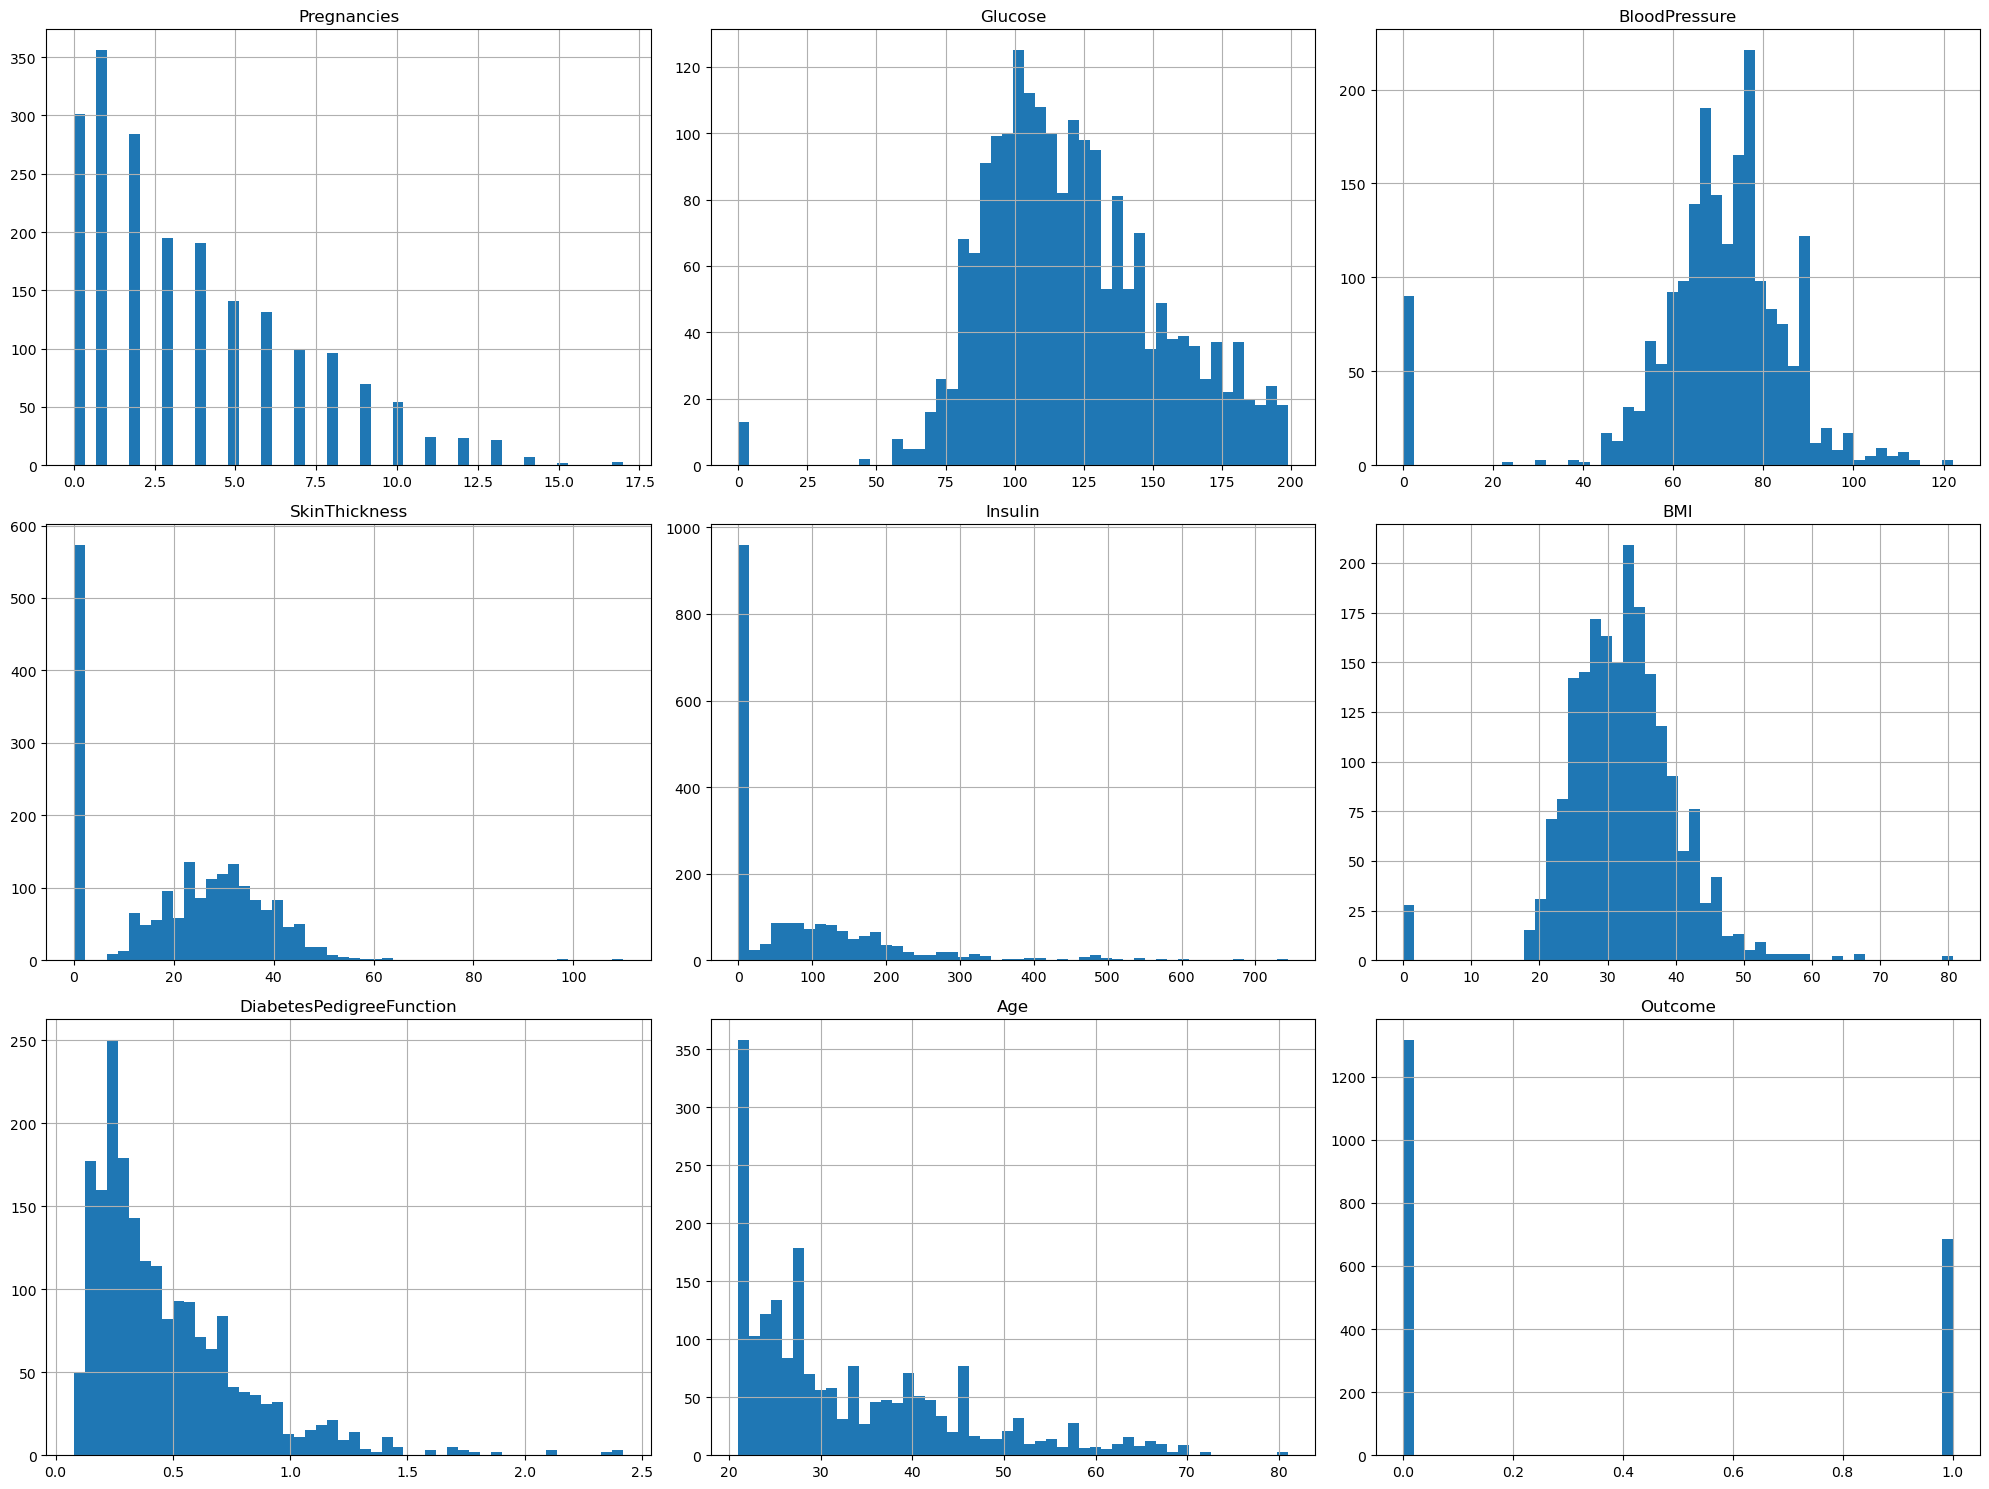

In [9]:
data.hist(bins=50, figsize=(20,15));
#sns.histplot(data.values.flatten(), bins=50, kde=True)
plt.tight_layout()
plt.savefig('../reports/figures/data_attr_distribution.pdf', dpi=600)

### Correlation Matrix

Find the correlation coefficient for each feature towards target label - Outcome

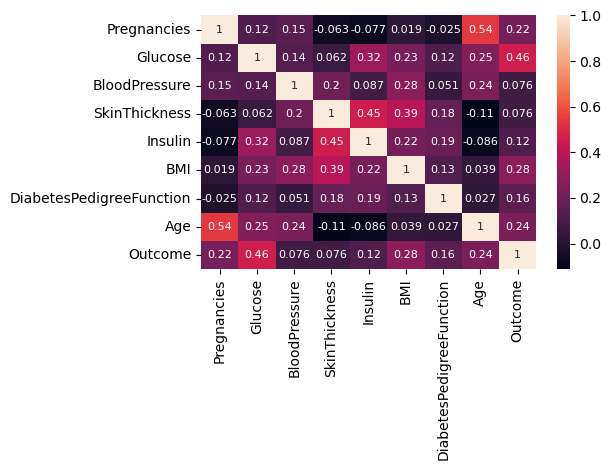

In [10]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 8})
plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('../reports/figures/data_correlation.pdf', dpi=600)

In [11]:
correlation_with_outcome = data.drop(columns=['Outcome']).corrwith(data['Outcome'])
print(correlation_with_outcome)

Pregnancies                 0.224437
Glucose                     0.458421
BloodPressure               0.075958
SkinThickness               0.076040
Insulin                     0.120924
BMI                         0.276726
DiabetesPedigreeFunction    0.155459
Age                         0.236509
dtype: float64


Use methods to determine all of the unique values and count for Outcome attribute.

Display and plot the total frequency for each type of outcome (To show total number of diabetic and non-diabetic patients in dataframe)

In [12]:
data.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

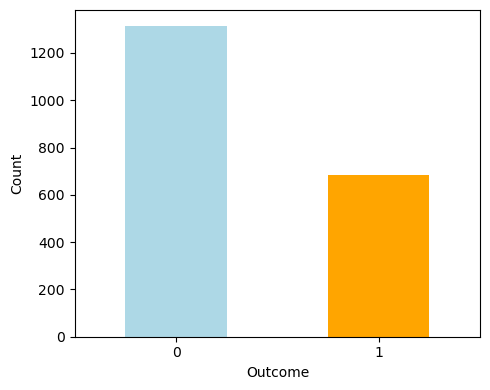

In [13]:
plt.figure(figsize=(5, 4))
data['Outcome'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'orange'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/figures/data_distribution.pdf', dpi=600)

### Attributes with Zero Values
There are no missing values but there are zero values for some attributes which needs to be handled. So, show the total count of zero values for each attribute

In [14]:
#Zero missing values
df = data.drop(columns='Outcome')
details = (df == 0).sum()
print('Attributes with count of zero values:\n',details)

Attributes with count of zero values:
 Pregnancies                 301
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### Impute Missing Data

Generate X and y labels. Assign all features except target label - Outcome to X label and assign Outcome feature to y label

In [15]:
X = data.drop(columns='Outcome')
y = data['Outcome']
print(X.shape)
print(y.shape)

(2000, 8)
(2000,)


Create a simple imputer that will fill in zero values with the mean value of that attribute.

In [16]:
# Create a simple imputer to fill in zero values with mean value of attribute
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(X)
X = pd.DataFrame(data=imputer.transform(X), columns = X.columns)

Confirm that there are no longer any zero values in the dataframe you will use for training.

In [17]:
# There are no zero values after imputing
details_after_imputer = (X==0).sum()
print('Attributes with count of zero values after imputation:\n',details_after_imputer)

Attributes with count of zero values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [18]:
details_before_imputer = pd.DataFrame(details, columns=['Count(Zeros)'])
details_after_imputer = pd.DataFrame(details_after_imputer, columns=['Count(Zeros) after imputation'])

combined_details = pd.concat([details_before_imputer, details_after_imputer], axis=1)

print(combined_details.style.to_latex())
combined_details.style.to_latex('../reports/tables/table-01-missing-values.tex')

\begin{tabular}{lrr}
 & Count(Zeros) & Count(Zeros) after imputation \\
Pregnancies & 301 & 0 \\
Glucose & 13 & 0 \\
BloodPressure & 90 & 0 \\
SkinThickness & 573 & 0 \\
Insulin & 956 & 0 \\
BMI & 28 & 0 \\
DiabetesPedigreeFunction & 0 & 0 \\
Age & 0 & 0 \\
\end{tabular}



In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.000000,138.0,62.000000,35.000000,153.743295,33.6,0.127,47.0
1,4.359623,84.0,82.000000,31.000000,125.000000,38.2,0.233,23.0
2,4.359623,145.0,72.403665,29.341275,153.743295,44.2,0.630,31.0
3,4.359623,135.0,68.000000,42.000000,250.000000,42.3,0.365,24.0
4,1.000000,139.0,62.000000,41.000000,480.000000,40.7,0.536,21.0


In [20]:
X = X.copy()
X.loc[:,'Outcome'] = y

### Correlation Matrix after Handling Attributes with Zero Values

Plot the heatmap to check the correlation coefficient values of each feature for outcome feature and you should see an improvement in coefficient values as we have handled zero values.

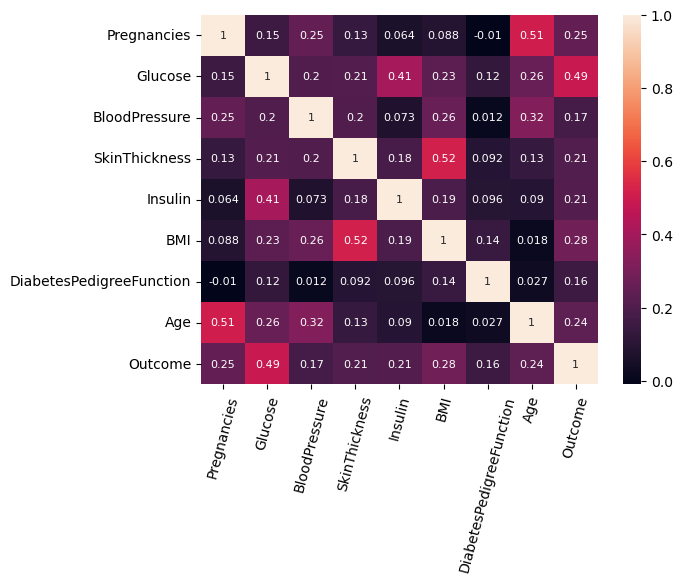

In [21]:
sns.heatmap(X.corr(), annot=True, annot_kws={"size": 8})
plt.xticks(rotation=75);

In [22]:
correlation_with_outcome_after_imputation = X.drop(columns=['Outcome']).corrwith(X['Outcome'])
print(correlation_with_outcome_after_imputation)

Pregnancies                 0.249883
Glucose                     0.488020
BloodPressure               0.174481
SkinThickness               0.205527
Insulin                     0.207696
BMI                         0.282182
DiabetesPedigreeFunction    0.155459
Age                         0.236509
dtype: float64


In [23]:
correlation_before_imputer = pd.DataFrame(correlation_with_outcome, columns=['Correlation Coefficient'])
correlation_after_imputer = pd.DataFrame(correlation_with_outcome_after_imputation, columns=['Correlation Coefficient after imputation'])

combined_correlation = pd.concat([correlation_before_imputer, correlation_after_imputer], axis=1)

print(combined_correlation.style.to_latex())
combined_correlation.style.to_latex('../reports/tables/table-02-correlation.tex')

\begin{tabular}{lrr}
 & Correlation Coefficient & Correlation Coefficient after imputation \\
Pregnancies & 0.224437 & 0.249883 \\
Glucose & 0.458421 & 0.488020 \\
BloodPressure & 0.075958 & 0.174481 \\
SkinThickness & 0.076040 & 0.205527 \\
Insulin & 0.120924 & 0.207696 \\
BMI & 0.276726 & 0.282182 \\
DiabetesPedigreeFunction & 0.155459 & 0.155459 \\
Age & 0.236509 & 0.236509 \\
\end{tabular}



### Feature Selection

Select the input features based on the correlation coefficients to get quality of results. Perform feature selection by placing a cut-off of 0.2. 

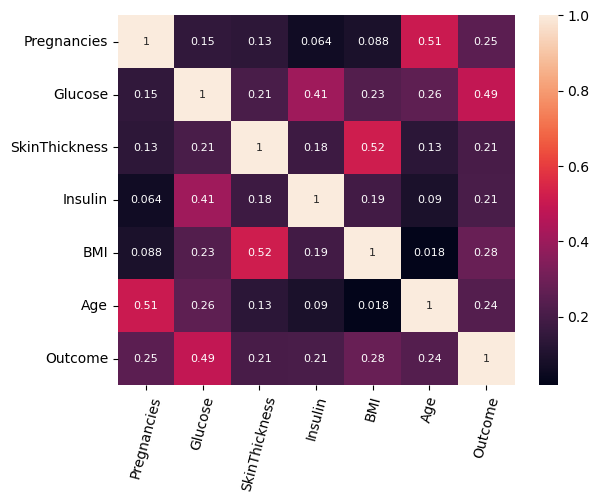

In [24]:
# Dropping all attributes/features by placing a cut-off value as 0.2
X = X.drop(columns=['BloodPressure', 'DiabetesPedigreeFunction'])
sns.heatmap(X.corr(), annot=True, annot_kws={"size": 8})
plt.xticks(rotation=75);

### Data Standardization
Perform scaling on input label X to normalize the data using Standard Scaler.

In [25]:
X = X.drop(columns=['Outcome']).values
y = y.values
print(X.shape)
print(y.shape)

(2000, 6)
(2000,)


In [26]:
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
print("\nBefore Scaling:\n")
print("Mean:", np.mean(X, axis=0))

print("\nAfter Scaling:\n")
print("Mean:", np.mean(X_scaled, axis=0))


Before Scaling:

Mean: [  4.35962331 121.97533971  29.3412754  153.74329502  32.65010142
  33.0905    ]

After Scaling:

Mean: [-1.28785871e-16  2.84217094e-17  2.59348099e-16 -2.55795385e-16
 -1.17239551e-16  1.13686838e-16]


### Data Splitting
Split the data in the ratio 70:30 using train_test_split() method where 70% data is for training the model and 30% data is for testing the model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.30, stratify= y, random_state=10)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1400, 6)
(1400,)
(600, 6)
(600,)


In [31]:
y_train = y_train.reshape(-1,1)

print(y_train.shape)

(1400, 1)


### Logistic Regression

Create a standard LogisticRegression using scikit-learn framework. Fit the logistic regression model to the attributes. Use the training set X_train and y_train. 

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train.ravel())

LogisticRegression()

#### Model Evaluation

Calculate the performance metrices that this model achieves on training and testing set. 
- Accuracy
- Confusion matrix 
- Precision, recall and f1-score by specifying the average as 'binary' as we are doing binary classification.

In [34]:
lr_pred_trained = model.predict(X_train)
print('LR model accuracy on training set: ', accuracy_score(y_train, lr_pred_trained))

LR model accuracy on training set:  0.7685714285714286


In [35]:
lr_conf_matrix_trained = confusion_matrix(y_train, lr_pred_trained)
print('Confusion Matrix:\n',lr_conf_matrix_trained)

Confusion Matrix:
 [[810 111]
 [213 266]]


In [36]:
lr_precision_trained = precision_score(y_train, lr_pred_trained, average='binary') 
print('Precision:',lr_precision_trained)

Precision: 0.7055702917771883


In [37]:
lr_recall_trained = recall_score(y_train, lr_pred_trained, average='binary')
print('Recall:',lr_recall_trained)

Recall: 0.5553235908141962


In [38]:
lr_f1_score_trained = f1_score(y_train, lr_pred_trained, average='binary')
print('F1_score:',lr_f1_score_trained)

F1_score: 0.6214953271028036


In [39]:
lr_pred_test = model.predict(X_test)
print('LR model accuracy on test set: ', accuracy_score(y_test, lr_pred_test))

LR model accuracy on test set:  0.7683333333333333


In [40]:
lr_conf_matrix_test = confusion_matrix(y_test, lr_pred_test)
print('Confusion Matrix:\n',lr_conf_matrix_test)

Confusion Matrix:
 [[347  48]
 [ 91 114]]


In [41]:
lr_precision_test = precision_score(y_test, lr_pred_test, average='binary') 
print('Precision:',lr_precision_test)

Precision: 0.7037037037037037


In [42]:
lr_recall_test = recall_score(y_test, lr_pred_test, average='binary')
print('Recall:',lr_recall_test)

Recall: 0.5560975609756098


In [43]:
lr_f1_score_test = f1_score(y_test, lr_pred_test, average='binary')
print('F1_score:',lr_f1_score_test)

F1_score: 0.6212534059945505


### Support Vector Machine

Create a standard svm model using scikit-learn framework. Fit the svm model to the attributes. Use the training set X_train and y_train.

In [44]:
classifier = svm.SVC(kernel='linear')

In [45]:
classifier.fit(X_train, y_train.ravel())

SVC(kernel='linear')

#### Model Evaluation

Calculate the performance metrices that this model achieves on training and testing set. 
- Accuracy
- Confusion matrix 
- Precision, recall and f1-score by specifying the average as 'binary' as we are doing binary classification.

In [46]:
svc_pred_trained = classifier.predict(X_train)
print('SVM model accuracy on training set: ', accuracy_score(y_train, svc_pred_trained))

SVM model accuracy on training set:  0.7657142857142857


In [47]:
svc_conf_matrix_trained = confusion_matrix(y_train, svc_pred_trained)
print('Confusion Matrix:\n',svc_conf_matrix_trained)

Confusion Matrix:
 [[804 117]
 [211 268]]


In [48]:
svc_precision_trained = precision_score(y_train, svc_pred_trained, average='binary') 
print('Precision:',svc_precision_trained)

Precision: 0.6961038961038961


In [49]:
svc_recall_trained = recall_score(y_train, svc_pred_trained, average='binary')
print('Recall:',svc_recall_trained)

Recall: 0.5594989561586639


In [50]:
svc_f1_score_trained = f1_score(y_train, svc_pred_trained, average='binary')
print('F1_score:',svc_f1_score_trained)

F1_score: 0.6203703703703703


In [51]:
svc_pred_test = classifier.predict(X_test)
print('SVC model accuracy on test set: ', accuracy_score(y_test, svc_pred_test))

SVC model accuracy on test set:  0.7683333333333333


In [52]:
svc_conf_matrix_test = confusion_matrix(y_test, svc_pred_test)
print('Confusion Matrix:\n',svc_conf_matrix_test)

Confusion Matrix:
 [[347  48]
 [ 91 114]]


In [53]:
svc_precision_test = precision_score(y_test, svc_pred_test, average='binary') 
print('Precision:',svc_precision_test)

Precision: 0.7037037037037037


In [54]:
svc_recall_test = recall_score(y_test, svc_pred_test, average='binary')
print('Recall:',svc_recall_test)

Recall: 0.5560975609756098


In [55]:
svc_f1_score_test = f1_score(y_test, svc_pred_test, average='binary')
print('F1_score:',svc_f1_score_test)

F1_score: 0.6212534059945505
